In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from itertools import accumulate
import scipy.integrate as si

In [2]:
df = pd.read_csv("income_shares.csv", header=1, skipfooter=2, engine='python')
df = df.rename(columns=lambda x: x.split("\r\n")[0])
df.head()

,Year,Number of Households (thousands),Lowest,Second,Third,Fourth,Highest,Top 5
0,2019,"128,451",3.1,8.3,14.1,22.7,51.9,23.0
1,2018,"128,579",3.1,8.3,14.1,22.6,52.0,23.1
2,2017,"127,586",3.1,8.2,14.3,23.0,51.5,22.3
3,2016,"126,224",3.1,8.3,14.2,22.9,51.5,22.6
4,2015,"125,819",3.1,8.2,14.3,23.2,51.1,22.1


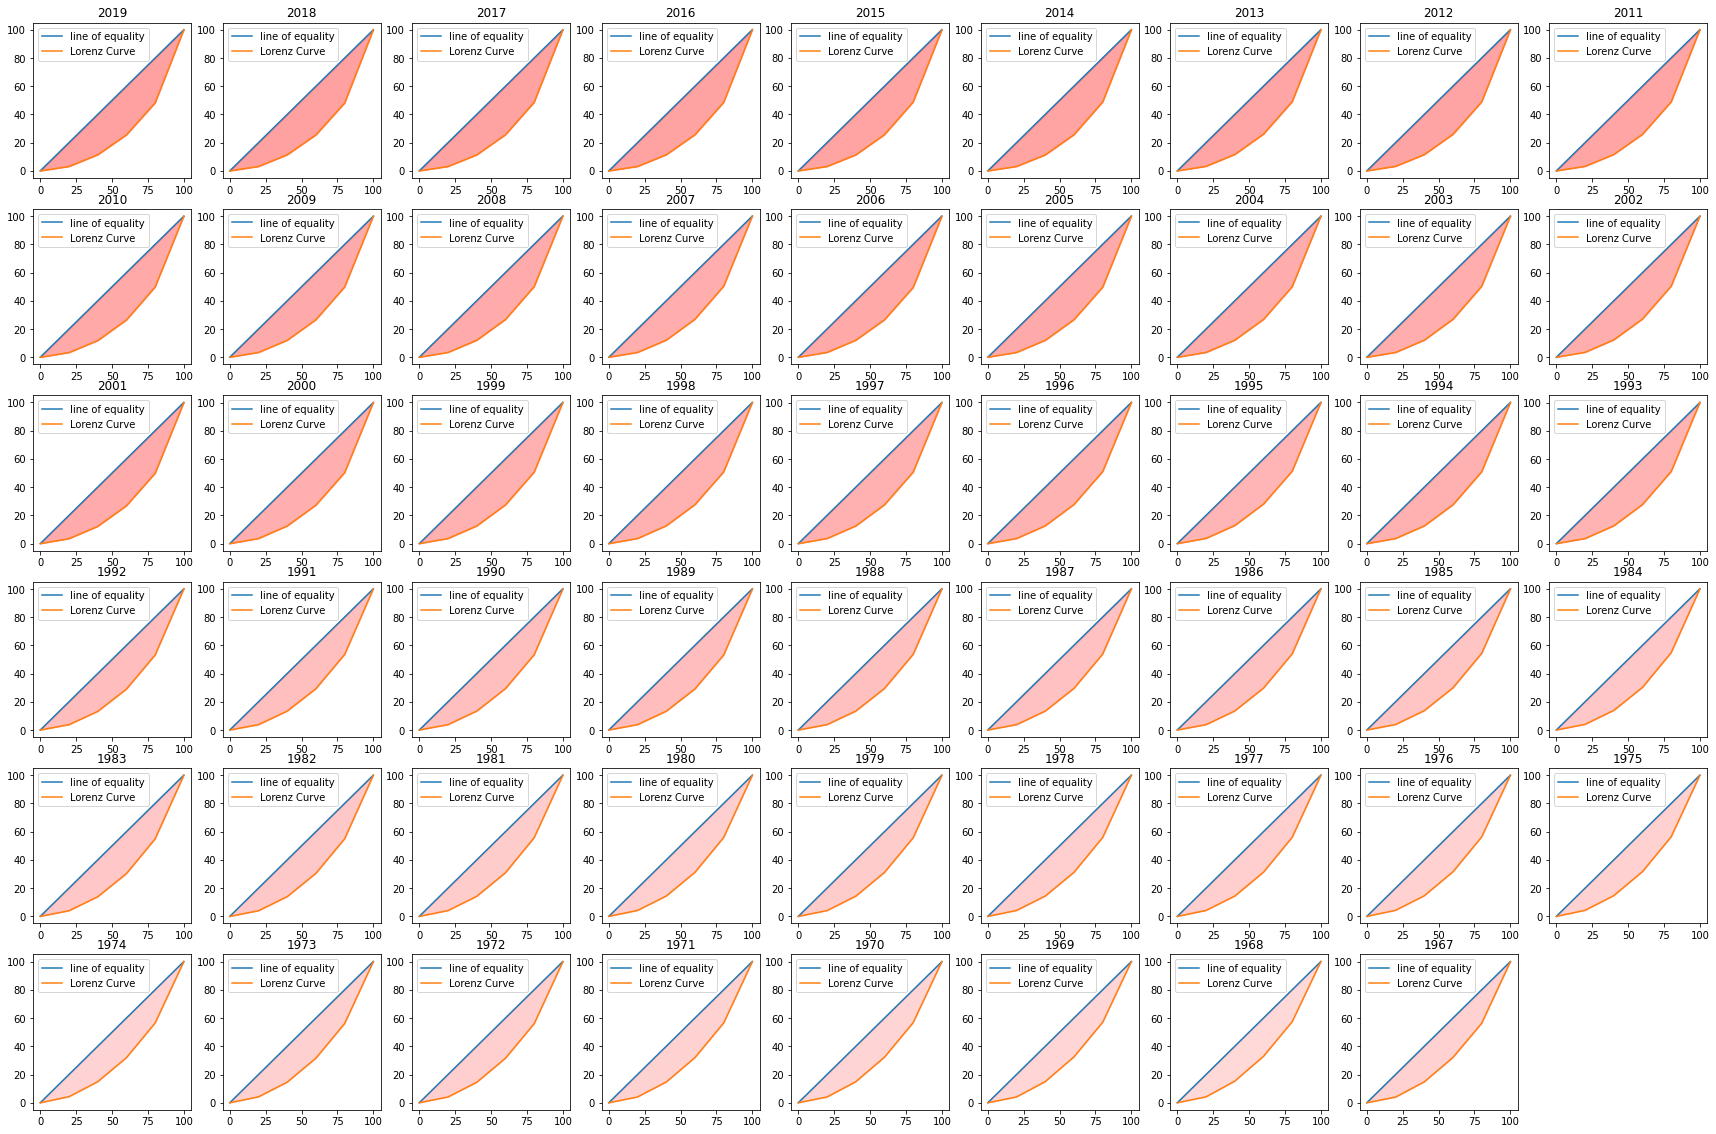

In [3]:
xs = np.arange(0, 101, 20)
line_of_eq = [(0, 100), (0, 100)]
fig, axes = plt.subplots(6, 9, figsize=[30, 20])
axes = axes.reshape(-1)
gini_list = []

for i in range(len(df)):
    ys = accumulate(df.iloc[i][["Lowest", "Second", "Third", "Fourth", "Highest"]].to_numpy())
    ys = [y for y in ys]
    ys.insert(0, 0)
    axes[i].plot(*line_of_eq, label="line of equality")
    axes[i].plot(xs, ys, label="Lorenz Curve")
    
    f = lambda x: np.interp(x, xs, ys)
    gini = si.quad(lambda x: x-f(x), 0, 100)[0] / 10000
    gini_list.append(gini)
    
    axes[i].fill_between(xs, ys, xs, alpha=(gini-0.15)*5, color="r")
    
    axes[i].legend()
    axes[i].set_title(df.iloc[i]["Year"])

axes[-1].set_visible(False)

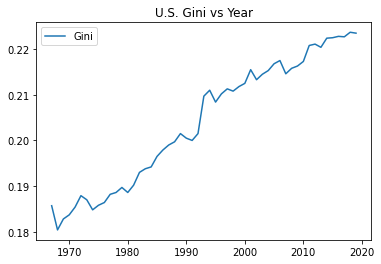

In [4]:
years = np.arange(1967, 2020)
plt.plot(years, gini_list[::-1], label="Gini")
plt.legend()
_ = plt.title("U.S. Gini vs Year")

Income inequality increased in U.S. for the past 50 years.